In [1]:
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

infos = pd.read_excel("../../1_NanoNASCseq/data/NanoNASCseq.xls")

('Human', 'Human')
('Mixed', 'Human')
('Mixed', 'Mouse')
('Mouse', 'Mouse')


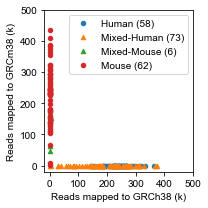

In [2]:
data = {
    "Human": "20220719_K562R3",
    "Mouse": "20220818_mESCR1",
    "Mixed": "20220729_K562R3"}

data1 = defaultdict(list)
for name, run in data.items():
    for cell, species in infos[infos["Run"] == run][["Cell", "Species"]].values:
        path = "../../1_NanoNASCseq/results/cross_species/species_reads/%s/%s.tsv" % (run, cell)
        d = pd.read_csv(path, sep="\t")
        human = d["Human"].values[0] - d["Human_Mito"].values[0]
        mouse = d["Mouse"].values[0] - d["Mouse_Mito"].values[0]
        data1[(name, species)].append([human, mouse])
        
plt.figure(figsize=(3, 3))
markers = ["o", "^", "^", "o"]
labels = ["Human", "Mixed-Human", "Mixed-Mouse","Mouse"]
for i, (k, v) in enumerate(sorted(data1.items())):
    print(k)
    xs = np.array([v1[0] / 1e3 for v1 in v])
    ys = np.array([v1[1] / 1e3 for v1 in v])
    # ks = ys / xs
    # print(min(ks) * 100, max(ks) * 100, sep="\t")
    plt.scatter(xs, ys, marker=markers[i], s=20, label="%s (%d)" % (labels[i], len(xs)))
plt.xlabel("Reads mapped to GRCh38 (k)")
plt.ylabel("Reads mapped to GRCm38 (k)")
plt.xlim(-20, 500)
plt.ylim(-20, 500)
plt.xticks([0, 100, 200, 300, 400, 500])
plt.yticks([0, 100, 200, 300, 400, 500])
#plt.gca().spines["top"].set_visible(False)
#plt.gca().spines["right"].set_visible(False)
plt.legend()
plt.tight_layout()
plt.savefig("figures/cross_species.pdf", dpi=300)